In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier


from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [0]:
def dataset_info(dataset):
    print('Table', dataset.head())
    print('Column names', dataset.columns)
    print(dataset.info())
    print('Number of columns and rows', dataset.shape)

    # Dataset correlation
    dc = dataset[1::].corr()
    sns.heatmap(dc, cmap = "Blues" , vmin=-1, vmax=1)
    plt.show()


def data_processing(dataset):
    dataset["y"] = dataset.y == 1  # change the y column to binary and set 1 for seizure and 0 for no seizure results
    X = dataset.iloc[:, 1:-1].values
    y = dataset.iloc[:, -1].values

    # Data visualization
    cols = dataset.columns
    tgt = dataset.y
    ax = sns.countplot(tgt, label="Count")
    plt.show()

    plt.subplot(511)
    plt.plot(X[1, :])
    plt.title('Classes')
    plt.ylabel('uV')
    plt.subplot(512)
    plt.plot(X[7, :])
    plt.subplot(513)
    plt.plot(X[12, :])
    plt.subplot(514)
    plt.plot(X[0, :])
    plt.subplot(515)
    plt.plot(X[2, :])
    plt.xlabel('Samples')
    plt.show()

    # Encoding categorical data
    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y)

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    return X_train, X_test, y_train, y_test


def classifier(classifier, X_train, X_test, y_train, y_test):
    # Fitting classifier to the Training set
    classifier = classifier
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix')
    print(cm)

    return y_pred

def neural(X_train, X_test, y_train, y_test):

    model = Sequential()
    model.add(Dense(64,
                    activation='relu',
                    kernel_regularizer=regularizers.l1(0.001),
                    input_shape=(178,)))
    # Add the second hidden layer
    model.add(Dense(64,
                    activation='relu',
                    kernel_regularizer=regularizers.l1(0.001)))
    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train,
                        y_train,
                        epochs=100,
                        batch_size=128,
                        validation_split=0.3,
                        verbose=2)
    score = model.evaluate(X_test, y_test, verbose=1, batch_size=128)

    print('score: ', score)

    predictions = model.predict(X_test)
    print(predictions)

    

def CalculateAccuracy(y_pred, classifier, X_test, y_test, title):

    # Apply Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate accuracy with threshhold 0.5
    thresh = 0.5
    accuracy = accuracy_score(y_test, (y_pred > thresh))

    # Applying k-Fold cross validation
    accuracies = cross_val_score(estimator=classifier, X=X_test, y=y_test, cv=10)
    ma = accuracies.mean()
    plt.plot(accuracies)
    plt.title(title)
    plt.show()

    return mse, accuracy, ma

def PCAfunc(X_train, X_test):
    pca = PCA(.95)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print('PCA: ', explained_variance)

    return X_train, X_test

def printResults(L1, L2, firstCL, secondCL, firstPCA, secondPCA):

    data = [{L1: firstCL[0], L2: secondCL[0]}, {L1:firstCL[1], L2: secondCL[1]}, {L1:firstCL[2], L2: secondCL[2]},
            {L1: firstPCA[0], L2: secondPCA[0]}, {L1:firstPCA[1], L2: secondPCA[1]}, {L1:firstPCA[2], L2: secondPCA[2]}]

    CrossVal = pd.DataFrame(data, index =['Mean Square Error', 'Accuracy Score', 'k-Fold',
                                          'Mean Square Error after PCA', 'Accuracy Score after PCA', 'k-Fold after PCA'])

    print(CrossVal)

------------------------------- Data info and preprocessing -------------------------------
Table    Unnamed: 0   X1   X2   X3   X4   X5  ...  X174  X175  X176  X177  X178  y
0  X21.V1.791  135  190  229  223  192  ...  -103  -127  -116   -83   -51  4
1  X15.V1.924  386  382  356  331  320  ...   157   156   154   143   129  1
2     X8.V1.1  -32  -39  -47  -37  -32  ...   -12   -30   -35   -35   -36  5
3   X16.V1.60 -105 -101  -96  -92  -89  ...   -85   -77   -72   -69   -65  5
4   X20.V1.54   -9  -65  -98 -102  -78  ...   -41   -65   -83   -89   -73  5

[5 rows x 180 columns]
Column names Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB
None
Number of columns a

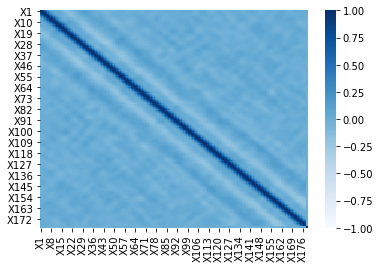

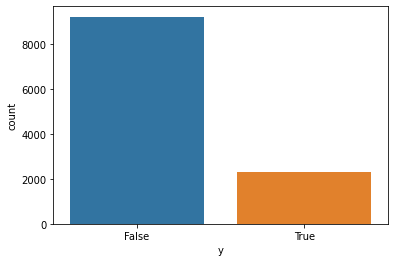

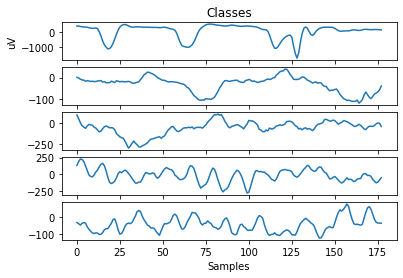

In [36]:
Epileptic_Seizures = pd.read_csv("data.csv", sep=",")


print("------------------------------- Data info and preprocessing -------------------------------")
dataset_info(Epileptic_Seizures)
DP = data_processing(Epileptic_Seizures)

------------------------------- Naive Bayes -------------------------------
Confusion matrix
[[2258   54]
 [  63  500]]


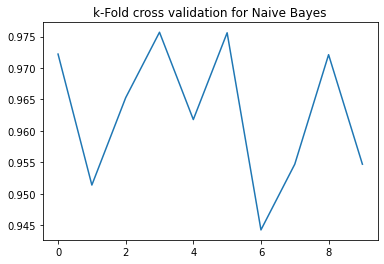

In [37]:
print("------------------------------- Naive Bayes -------------------------------")
pred_NB = classifier(GaussianNB(), DP[0], DP[1], DP[2], DP[3])
n = CalculateAccuracy(pred_NB, GaussianNB(), DP[1], DP[3], 'k-Fold cross validation for Naive Bayes')

------------------------------- Linear Classifier -------------------------------
Confusion matrix
[[2312    0]
 [ 543   20]]


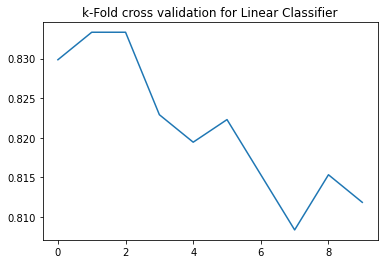

In [38]:
print("------------------------------- Linear Classifier -------------------------------")
pred_LC = classifier(SGDClassifier(alpha=0.1, random_state=42),  DP[0], DP[1], DP[2], DP[3])
ln = CalculateAccuracy(pred_LC, SGDClassifier(alpha=0.1, random_state=42), DP[1], DP[3], 'k-Fold cross validation for Linear Classifier')

In [39]:
print("------------------------------- Neural Network -------------------------------")
neural(DP[0], DP[1], DP[2], DP[3])

------------------------------- Neural Network -------------------------------
Train on 6037 samples, validate on 2588 samples
Epoch 1/100
 - 0s - loss: 1.6835 - accuracy: 0.8628 - val_loss: 1.4477 - val_accuracy: 0.9297
Epoch 2/100
 - 0s - loss: 1.2446 - accuracy: 0.9533 - val_loss: 1.1115 - val_accuracy: 0.9482
Epoch 3/100
 - 0s - loss: 0.9409 - accuracy: 0.9655 - val_loss: 0.8608 - val_accuracy: 0.9525
Epoch 4/100
 - 0s - loss: 0.7201 - accuracy: 0.9692 - val_loss: 0.6848 - val_accuracy: 0.9579
Epoch 5/100
 - 0s - loss: 0.5696 - accuracy: 0.9717 - val_loss: 0.5661 - val_accuracy: 0.9579
Epoch 6/100
 - 0s - loss: 0.4669 - accuracy: 0.9727 - val_loss: 0.4784 - val_accuracy: 0.9590
Epoch 7/100
 - 0s - loss: 0.3903 - accuracy: 0.9750 - val_loss: 0.4171 - val_accuracy: 0.9633
Epoch 8/100
 - 0s - loss: 0.3378 - accuracy: 0.9766 - val_loss: 0.3701 - val_accuracy: 0.9560
Epoch 9/100
 - 0s - loss: 0.2979 - accuracy: 0.9763 - val_loss: 0.3381 - val_accuracy: 0.9594
Epoch 10/100
 - 0s - loss: 

In [40]:
print("------------------------------- Results after PCA -------------------------------")
pcaVar = PCAfunc(DP[0], DP[1])

------------------------------- Results after PCA -------------------------------
PCA:  [0.05865469 0.05292362 0.04988589 0.04931808 0.04388127 0.04171847
 0.04022992 0.03876525 0.03716453 0.03396264 0.03254656 0.03177814
 0.0295583  0.02859748 0.02648753 0.02384501 0.02214877 0.02070633
 0.01981004 0.01949104 0.018675   0.01791958 0.01756994 0.01713489
 0.01683678 0.0162739  0.01546988 0.01474533 0.01402429 0.01347866
 0.01342772 0.01261403 0.01223517 0.01126851 0.01115241 0.00923593
 0.00823602 0.0064804  0.00600239]


Naive Bayes
Confusion matrix
[[2253   59]
 [  51  512]]


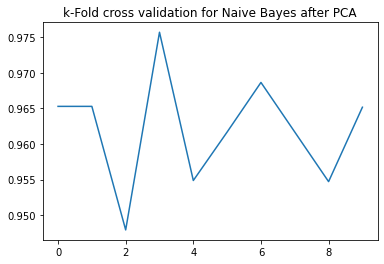

In [41]:
print('Naive Bayes')
pred_NB = classifier(GaussianNB(), pcaVar[0], pcaVar[1], DP[2], DP[3])
nPCA = CalculateAccuracy(pred_NB, GaussianNB(), pcaVar[1], DP[3], 'k-Fold cross validation for Naive Bayes after PCA')

Linear Classifier
Confusion matrix
[[2312    0]
 [ 554    9]]


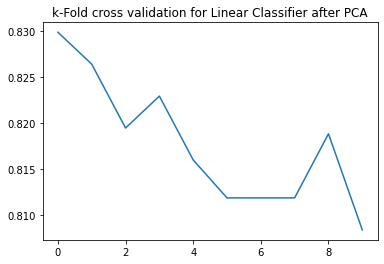

In [42]:
print('Linear Classifier')
pred_LC = classifier(SGDClassifier(alpha=0.1, random_state=42),  pcaVar[0], pcaVar[1], DP[2], DP[3])
lnPCA = CalculateAccuracy(pred_LC, SGDClassifier(alpha=0.1, random_state=42), pcaVar[1], DP[3], 'k-Fold cross validation for Linear Classifier after PCA')

In [43]:
printResults('Naive Bayes', 'Linear Classifier', n, ln, nPCA, lnPCA)

                             Naive Bayes  Linear Classifier
Mean Square Error               0.040696           0.188870
Accuracy Score                  0.959304           0.811130
k-Fold                          0.962778           0.821206
Mean Square Error after PCA     0.038261           0.192696
Accuracy Score after PCA        0.961739           0.807304
k-Fold after PCA                0.962087           0.817730
